## Customer Support Twitter Analysis for Airline Companies

##### Objective:
This notebook explores customer interactions in a Customer Support Twitter dataset. We focus on understanding the relationship between response times and customer satisfaction for Airline companies, American and Delta.

##### Approach:
Through meticulous analysis, we get into response times and customer sentiments in conversations. By examining these factors, we aim to uncover valuable patterns and trends, offering insights into effective customer support practices.

##### Key Question: 
How does response time correlate to customer satisfaction when comparing American Airlines & Delta?

##### Purpose impact:
This analysis aims to help the analyzed companies by providing actionable insights derived from customer interactions. By understanding customer sentiments and response dynamics, these technology support companies can optimize their communication strategies, fostering improved customer satisfaction and engagement.

In [126]:
# Imports used in this Python file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [127]:
# Load the Dataset
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')
data_set.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [128]:
data_set.shape

(2811774, 7)

#### Exploring and cleaning the data to obtain specific companies 

In [129]:
# Handle missing values
data_set['response_tweet_id'].fillna(-1, inplace=True)
data_set['in_response_to_tweet_id'].fillna(-1, inplace=True)

In [130]:
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]

In [131]:
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,Sat Aug 06 01:44:03 +0000 2016,"@115818 Glad to check. Pls, DM your confirmati...",610,611.0
484,790,Delta,False,Tue Oct 31 22:27:38 +0000 2017,@115882 I'm sorry. The earlier flight may not ...,791,792.0
486,793,Delta,False,Tue Oct 31 22:52:37 +0000 2017,@115882 My apologies. If that flight never sho...,-1,791.0
488,794,Delta,False,Tue Oct 31 22:25:31 +0000 2017,@115883 Please share additional details about ...,795,796.0
490,797,Delta,False,Tue Oct 31 23:07:41 +0000 2017,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798,795.0
493,799,Delta,False,Sun Oct 29 16:56:47 +0000 2017,"@115883 I sincerely apologize, our IT team is ...","800,796",801.0
495,802,Delta,False,Tue Oct 31 22:23:07 +0000 2017,"@115884 Oh, no! Please speak to a member of th...",-1,803.0
497,804,Delta,False,Tue Oct 31 22:22:01 +0000 2017,@115885 2/2 https://t.co/6iDGBJAc2m,"805,806",807.0
501,809,Delta,False,Tue Oct 31 19:21:13 +0000 2017,"@115885 Hello, Richard! Please DM your confirm...",807,810.0
504,813,Delta,False,Tue Oct 31 18:42:21 +0000 2017,"@115885 Hi, Richard. Can you pls DM your confi...",811,814.0


In [132]:
# Handle Missing Values
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]
filtered_data = data_set.dropna()
print(filtered_data.isnull().sum())

tweet_id                   0
author_id                  0
inbound                    0
created_at                 0
text                       0
response_tweet_id          0
in_response_to_tweet_id    0
dtype: int64


In [133]:
# Group the filtered data and count the number of tweets in each company
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]
grouped_data = filtered_data.groupby(['author_id', 'inbound']).size().reset_index(name='count')
grouped_data.head(10)

,author_id,inbound,count
0,AmericanAir,False,36764
1,Delta,False,42253


#### What company has the most and least amount of tweets?

In [134]:
fig = px.bar(grouped_data, x=grouped_data.index, y='count', color='author_id', title='Inbound Tweets for Each Company')
fig.show()

In [135]:
# Convert 'response_tweet_id' and 'in_response_to_tweet_id' to numeric 
filtered_data['response_tweet_id'] = pd.to_numeric(filtered_data['response_tweet_id'], errors='coerce')
filtered_data['in_response_to_tweet_id'] = pd.to_numeric(filtered_data['in_response_to_tweet_id'], errors='coerce')
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,Sat Aug 06 01:44:03 +0000 2016,"@115818 Glad to check. Pls, DM your confirmati...",610.0,611.0
484,790,Delta,False,Tue Oct 31 22:27:38 +0000 2017,@115882 I'm sorry. The earlier flight may not ...,791.0,792.0
486,793,Delta,False,Tue Oct 31 22:52:37 +0000 2017,@115882 My apologies. If that flight never sho...,-1.0,791.0
488,794,Delta,False,Tue Oct 31 22:25:31 +0000 2017,@115883 Please share additional details about ...,795.0,796.0
490,797,Delta,False,Tue Oct 31 23:07:41 +0000 2017,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798.0,795.0
493,799,Delta,False,Sun Oct 29 16:56:47 +0000 2017,"@115883 I sincerely apologize, our IT team is ...",NaN,801.0
495,802,Delta,False,Tue Oct 31 22:23:07 +0000 2017,"@115884 Oh, no! Please speak to a member of th...",-1.0,803.0
497,804,Delta,False,Tue Oct 31 22:22:01 +0000 2017,@115885 2/2 https://t.co/6iDGBJAc2m,NaN,807.0
501,809,Delta,False,Tue Oct 31 19:21:13 +0000 2017,"@115885 Hello, Richard! Please DM your confirm...",807.0,810.0
504,813,Delta,False,Tue Oct 31 18:42:21 +0000 2017,"@115885 Hi, Richard. Can you pls DM your confi...",811.0,814.0


In [136]:
# Calculate response time in filtered data
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

In [137]:
# Calculate average response time for each airline
average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

#### Statistical Predicitions / Modeling

In [138]:
correlation = filtered_data.corr(numeric_only=True)

filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

print(average_response_time)

author_id
AmericanAir   -9.832385e+05
Delta         -1.069096e+06
Name: response_time, dtype: float64


##### Convert to positive numbers for better analysis

In [139]:
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean().abs()

print(average_response_time)

author_id
AmericanAir    9.832385e+05
Delta          1.069096e+06
Name: response_time, dtype: float64


#### What company has the slowest and fastest response time?

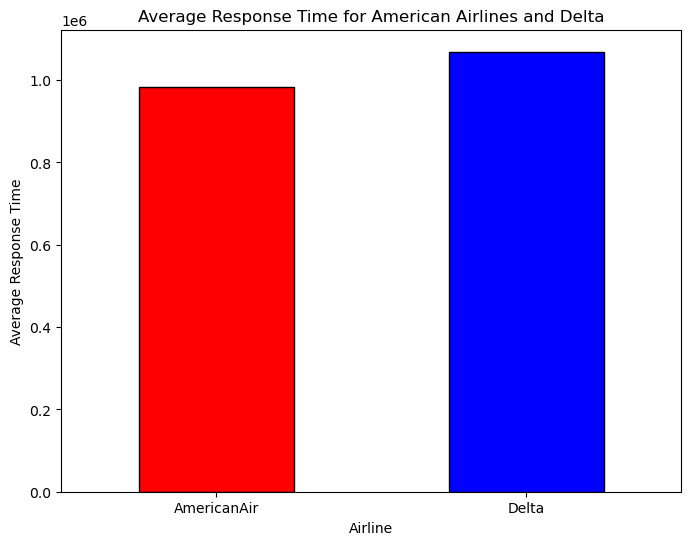

In [145]:
# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue'] 
average_response_time.plot(kind='bar', color=colors, edgecolor='black') 
plt.title('Average Response Time for American Airlines and Delta')
plt.xlabel('Airline')
plt.ylabel('Average Response Time')
plt.xticks(range(len(average_response_time.index)), average_response_time.index, rotation=0)
plt.show()

#### Now let's compare the total inbound tweets and the repsonse time of both companies

#### American Airlines

In [146]:
average_response_time_american = 9.832385e+05
inbound_tweet_count_american = 36764 
final_response_time_american = inbound_tweet_count_american * average_response_time_american
print(f"Final Response Time for American Airline: {final_response_time_american} milliseconds")

Final Response Time for American Airline: 36147780214.0 milliseconds


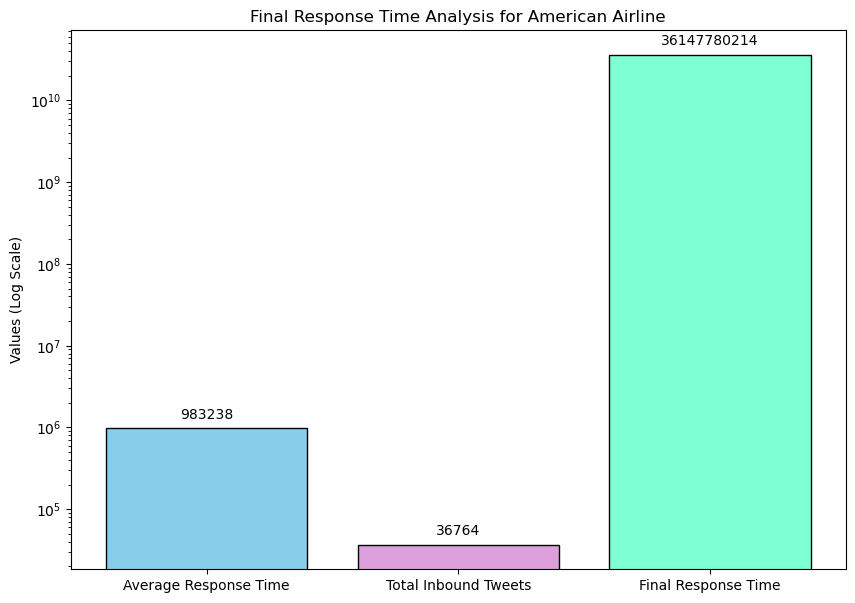

In [147]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_american, inbound_tweet_count_american, final_response_time_american]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['skyblue', 'plum', 'aquamarine'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for American Airline')
plt.show()


#### Delta Airlines

In [148]:
average_response_time_delta = 1.069096e+06
inbound_tweet_count_delta = 42253
final_response_time_delta = inbound_tweet_count_delta * average_response_time_delta
print(f"Final Response Time for Delta Airlines: {final_response_time_delta} milliseconds")

Final Response Time for Delta Airlines: 45172513288.0 milliseconds


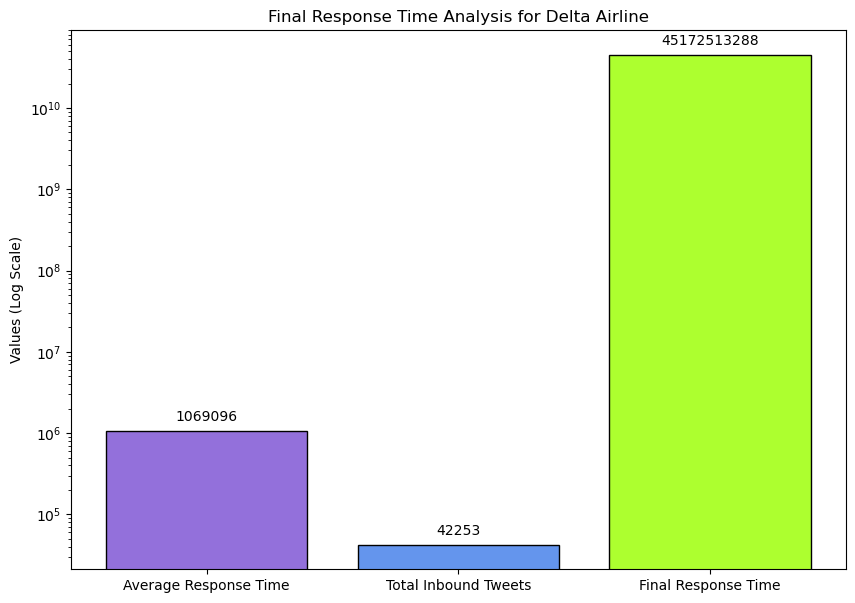

In [149]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_delta, inbound_tweet_count_delta, final_response_time_delta]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['mediumpurple', 'cornflowerblue', 'greenyellow'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for Delta Airline')
plt.show()


#### Comparing final response times of American Airline and Delta Airline

#### What company has a faster final response time?

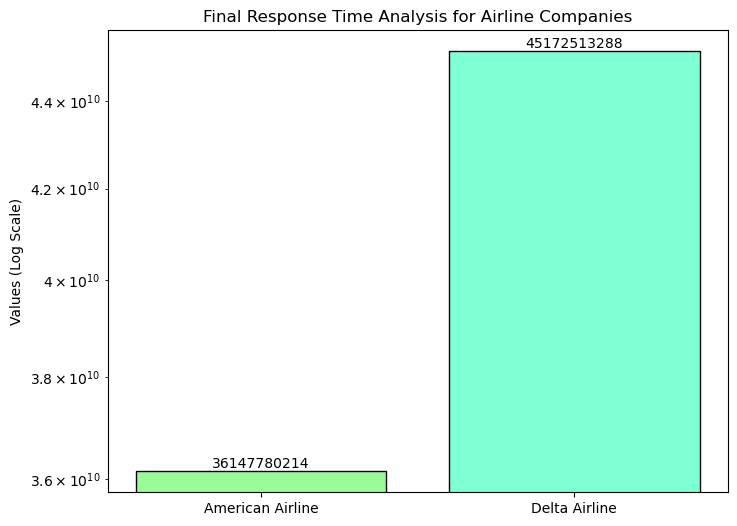

In [150]:
categories = ['American Airline', 'Delta Airline']
values = [final_response_time_american, final_response_time_delta]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['palegreen','aquamarine'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for Airline Companies')
plt.show()

## Result
American Airlines with an average response time of approximately 36,147,780,214 units is faster than Delta with an average response time of approximately 45,172,513,288 units. This can correlate to customers being more satified with American Airlines customer support via the tweet data set.